To determine the best players, position players had to play a minimum of 50 games at the position they were selected for.  Pitchers had to have at least 10 plate appearances to be selected.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
my_90s_team = {"Player": ["Allen Watson", "Michael Barrett", "Jeff Bagwell", "Chuck Knoblauch", "Corey Koskie", "Derek Jeter", "Barry Bonds", "Preston Wilson", "Bobby Higginson"], "Position": ["P", "C", "1B", "2B", "3B", "SS", "LF", "CF", "RF"], "Year": ["1995", "1999", "1994", "1992", "1999", "1996", "1990", "1999", "1996"], "Salary": [155000, 200500, 2525000, 325000, 200000, 130000, 850000, 201000, 170000], "OBP": [0.447, 0.345, 0.451, 0.384, 0.387, 0.370, 0.406, 0.350, 0.404]}
my_00s_team = {"Player": ["Wes Obermueller", "Brian McCann", "Ryan Howard", "Brian Roberts", "Garett Atkins", "Hanley Ramirez", "Denard Span", "B.J. Upton", "Nick Markakis"], "Position": ["P", "C", "1B", "2B", "3B", "SS", "LF", "CF", "RF"], "Year": ["2004", "2006", "2006", "2005", "2006", "2008", "2009", "2007", "2008"], "Salary": [314000, 333500, 355000, 390000, 335000, 439000, 435000, 386900, 455000], "OBP": [0.400, 0.388, 0.425, 0.387, 0.409, 0.400, 0.392, 0.386, 0.406]}
my_10s_team = {"Player": ["Yovani Gallardo", "Alex Avila", "Paul Goldschmidt", "Jason Kipnis", "Pablo Sandoval", "Elvis Andrus", "Corey Dickerson", "Mike Trout", "Jason Heyward"], "Position": ["P", "C", "1B", "2B", "3B", "SS", "LF", "CF", "RF"], "Year": ["2010", "2011", "2013", "2013", "2011", "2010", "2014", "2013", "2010"], "Salary": [450000, 425000, 500000, 509400, 500000, 418420, 500000, 510000, 400000], "OBP": [0.329, 0.389, 0.401, 0.377, 0.356, 0.342, 0.364, 0.432, 0.393]}
my_80s_team = {"Player": ["Dave Rucker", "Mike Scioscia", "Mark Grace", "Toby Harrah", "Kevin Seitzer", "Jody Reed", "Dan Pasqua", "Gerald Young", "Danny Tartabull"], "Position": ["P", "C", "1B", "2B", "3B", "SS", "LF", "CF", "RF"], "Year": ["1985", "1985", "1989", "1985", "1987", "1988", "1986", "1987", "1987"], "Salary": [220000, 435000, 140000, 650000, 62500, 64500, 70000, 62500, 145000], "OBP": [0.385, 0.407, 0.405, 0.432, 0.399, 0.380, 0.399, 0.380, 0.390]}

In [3]:
batting = pd.read_csv("data/Batting.csv")
salaries = pd.read_csv("data/Salaries.csv")
master = pd.read_csv("data/Master.csv")
appearances = pd.read_csv("data/Appearances.csv")

In [4]:
master = master.drop(["birthYear", "birthMonth", "birthDay", "birthCountry", "birthState", "birthCity", "deathYear", "deathMonth", "deathDay", "weight", "height", "bats", "throws", "debut", "finalGame", "retroID", "bbrefID"], axis=1)
master = master.drop(["deathCountry", "deathState", "deathCity", "nameGiven"], axis=1)

In [5]:
batting_90s = batting[batting.yearID.isin([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999])]
salaries_90s = salaries[salaries.yearID.isin([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999])]
appearances_90s = appearances[appearances.yearID.isin([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999])]
everything_90s = pd.merge(batting_90s, salaries_90s, how="inner", left_on=["yearID", "playerID"], right_on=["yearID", "playerID"])
everything_90s = pd.merge(everything_90s, appearances_90s, how="inner", left_on=["yearID", "playerID"], right_on=["yearID", "playerID"])

In [6]:
everything_90s = everything_90s.set_index(["playerID"])
everything_90s = everything_90s.drop(["stint", "teamID_x", "lgID_x", "lgID_y"], axis=1)
everything_90s = everything_90s.drop(["lgID", "G_all", "GS", "G_batting", "G_defense", "G_pr", "G_ph", "G_dh"], axis=1)
everything_90s = everything_90s.drop(["R", "2B", "3B", "HR", "RBI", "SB", "CS", "SO", "SH", "GIDP", "IBB"], axis=1)
everything_90s = everything_90s.sort(axis=0)
everything_90s["OBP"] = (everything_90s.H + everything_90s.HBP + everything_90s.BB) / (everything_90s.AB + everything_90s.BB + everything_90s.HBP +everything_90s.SF)
everything_90s = everything_90s[pd.notnull(everything_90s['OBP'])]
everything_90s = everything_90s.drop_duplicates(["yearID", "G", "AB"])
everything_90s = everything_90s.drop(["H", "BB", "HBP", "SF"], axis=1)

In [7]:
everything_hitters_90s = everything_90s.drop(everything_90s[everything_90s.G < 100].index)
everything_hitters_90s = pd.merge(everything_hitters_90s, master, how="inner", left_index=True, right_on="playerID")
everything_hitters_90s = everything_hitters_90s.set_index(["playerID"])
everything_hitters_90s = everything_hitters_90s.sort(columns='OBP', axis=0, ascending=False)
everything_hitters_90s = everything_hitters_90s.drop(["G_p", "G_of"], axis=1)

In [8]:
hit_90s_c = everything_hitters_90s[["yearID", "G", "AB", "G_c", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_90s_1b = everything_hitters_90s[["yearID", "G", "AB", "G_1b", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_90s_2b = everything_hitters_90s[["yearID", "G", "AB", "G_2b", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_90s_3b = everything_hitters_90s[["yearID", "G", "AB", "G_3b", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_90s_ss = everything_hitters_90s[["yearID", "G", "AB", "G_ss", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_90s_lf = everything_hitters_90s[["yearID", "G", "AB", "G_lf", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_90s_cf = everything_hitters_90s[["yearID", "G", "AB", "G_cf", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_90s_rf = everything_hitters_90s[["yearID", "G", "AB", "G_rf", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_90s_c = hit_90s_c.drop(hit_90s_c[hit_90s_c.G_c < 50].index)
hit_90s_1b = hit_90s_1b.drop(hit_90s_1b[hit_90s_1b.G_1b < 50].index)
hit_90s_2b = hit_90s_2b.drop(hit_90s_2b[hit_90s_2b.G_2b < 50].index)
hit_90s_3b = hit_90s_3b.drop(hit_90s_3b[hit_90s_3b.G_3b < 50].index)
hit_90s_ss = hit_90s_ss.drop(hit_90s_ss[hit_90s_ss.G_ss < 50].index)
hit_90s_lf = hit_90s_lf.drop(hit_90s_lf[hit_90s_lf.G_lf < 50].index)
hit_90s_cf = hit_90s_cf.drop(hit_90s_cf[hit_90s_cf.G_cf < 50].index)
hit_90s_rf = hit_90s_rf.drop(hit_90s_rf[hit_90s_rf.G_rf < 50].index)

In [9]:
everything_hitters_90s

,yearID,G,AB,teamID_y,salary,teamID,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,OBP,nameFirst,nameLast
playerID,,,,,,,,,,,,,,,,,
thomafr04,1994,113,399,CHA,2755000,CHA,0,99,0,0,0,0,0,0,0.487427,Frank,Thomas
olerujo01,1993,158,551,TOR,1562500,TOR,0,137,0,0,0,0,0,0,0.472754,John,Olerud
bondsba01,1996,158,517,SFN,8416667,SFN,0,0,0,0,0,149,6,0,0.460741,Barry,Bonds
oneilpa01,1994,103,368,NYA,3858334,NYA,0,0,0,0,0,12,0,90,0.460497,Paul,O'Neill
thomafr04,1996,141,527,CHA,7150000,CHA,0,139,0,0,0,0,0,0,0.459168,Frank,Thomas
bondsba01,1993,159,539,SFN,4516666,SFN,0,0,0,0,0,157,0,0,0.458457,Barry,Bonds
thomafr04,1997,146,530,CHA,7150000,CHA,0,97,0,0,0,0,0,0,0.456086,Frank,Thomas
bondsba01,1992,140,473,PIT,4800000,PIT,0,0,0,0,0,139,0,0,0.455882,Barry,Bonds
thomafr04,1995,145,493,CHA,7150000,CHA,0,90,0,0,0,0,0,0,0.454405,Frank,Thomas


In [10]:
pitchers_90s = everything_90s.drop(everything_90s[everything_90s.G_p <= 1].index)
pitchers_90s = pitchers_90s.drop(["G_c", "G_1b", "G_c", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf", "G_of"], axis=1)
pitchers_90s = pd.merge(pitchers_90s, master, how="inner", left_index=True, right_on="playerID")
pitchers_90s = pitchers_90s.set_index(["playerID"])
pitchers_90s = pitchers_90s.sort(columns="OBP", axis=0, ascending=False)
pitchers_90s = pitchers_90s.drop(pitchers_90s[pitchers_90s.AB < 10].index)

In [11]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 20):
    print(hit_90s_rf)

           yearID    G   AB  G_rf nameFirst   nameLast   salary       OBP  \
playerID                                                                    
oneilpa01    1994  103  368    90      Paul    O'Neill  3858334  0.460497   
gwynnto01    1994  110  419   105      Tony      Gwynn  3633333  0.453586   
oneilpa01    1996  150  546   146      Paul    O'Neill  5300000  0.410606   
gwynnto01    1997  149  592   143      Tony      Gwynn  4575000  0.409231   
higgibo02    1996  130  440    57     Bobby  Higginson   170000  0.404297   
gwynnto01    1995  135  535   133      Tony      Gwynn  4658334  0.403813   
gwynnto01    1996  116  451   111      Tony      Gwynn  4300000  0.400402   
oneilpa01    1997  149  553   146      Paul    O'Neill  5500000  0.398744   
gwynnto01    1993  122  489   121      Tony      Gwynn  4333333  0.397749   
oneilpa01    1995  127  460   107      Paul    O'Neill  2850000  0.386740   
gwynnto01    1999  111  411   104      Tony      Gwynn  4400000  0.381166   

In [12]:
batting_00s = batting[batting.yearID.isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])]
salaries_00s = salaries[salaries.yearID.isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])]
appearances_00s = appearances[appearances.yearID.isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])]
everything_00s = pd.merge(batting_00s, salaries_00s, how="inner", left_on=["yearID", "playerID"], right_on=["yearID", "playerID"])
everything_00s = pd.merge(everything_00s, appearances_00s, how="inner", left_on=["yearID", "playerID"], right_on=["yearID", "playerID"])

In [13]:
everything_00s = everything_00s.set_index(["playerID"])
everything_00s = everything_00s.drop(["stint", "teamID_x", "lgID_x", "lgID_y"], axis=1)
everything_00s = everything_00s.drop(["lgID", "G_all", "GS", "G_batting", "G_defense", "G_pr", "G_ph", "G_dh"], axis=1)
everything_00s = everything_00s.drop(["R", "2B", "3B", "HR", "RBI", "SB", "CS", "SO", "SH", "GIDP", "IBB"], axis=1)
everything_00s["OBP"] = (everything_00s.H + everything_00s.HBP + everything_00s.BB) / (everything_00s.AB + everything_00s.BB + everything_00s.HBP +everything_00s.SF)
everything_00s = everything_00s.sort(axis=0)
everything_00s = everything_00s[pd.notnull(everything_00s['OBP'])]
everything_00s = everything_00s.drop_duplicates(["yearID", "G", "AB"])
everything_00s = everything_00s.drop(["H", "BB", "HBP", "SF"], axis=1)

In [14]:
everything_hitters_00s = everything_00s.drop(everything_00s[everything_00s.G < 100].index)
everything_hitters_00s = pd.merge(everything_hitters_00s, master, how="inner", left_index=True, right_on="playerID")
everything_hitters_00s = everything_hitters_00s.set_index(["playerID"])
everything_hitters_00s = everything_hitters_00s.sort(columns='OBP', axis=0, ascending=False)
everything_hitters_00s = everything_hitters_00s.drop(["G_p", "G_of"], axis=1)

In [15]:
hit_00s_c = everything_hitters_00s[["yearID", "G", "AB", "G_c", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_00s_1b = everything_hitters_00s[["yearID", "G", "AB", "G_1b", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_00s_2b = everything_hitters_00s[["yearID", "G", "AB", "G_2b", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_00s_3b = everything_hitters_00s[["yearID", "G", "AB", "G_3b", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_00s_ss = everything_hitters_00s[["yearID", "G", "AB", "G_ss", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_00s_lf = everything_hitters_00s[["yearID", "G", "AB", "G_lf", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_00s_cf = everything_hitters_00s[["yearID", "G", "AB", "G_cf", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_00s_rf = everything_hitters_00s[["yearID", "G", "AB", "G_rf", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_00s_c = hit_00s_c.drop(hit_00s_c[hit_00s_c.G_c < 50].index)
hit_00s_1b = hit_00s_1b.drop(hit_00s_1b[hit_00s_1b.G_1b < 50].index)
hit_00s_2b = hit_00s_2b.drop(hit_00s_2b[hit_00s_2b.G_2b < 50].index)
hit_00s_3b = hit_00s_3b.drop(hit_00s_3b[hit_00s_3b.G_3b < 50].index)
hit_00s_ss = hit_00s_ss.drop(hit_00s_ss[hit_00s_ss.G_ss < 50].index)
hit_00s_lf = hit_00s_lf.drop(hit_00s_lf[hit_00s_lf.G_lf < 50].index)
hit_00s_cf = hit_00s_cf.drop(hit_00s_cf[hit_00s_cf.G_cf < 50].index)
hit_00s_rf = hit_00s_rf.drop(hit_00s_rf[hit_00s_rf.G_rf < 50].index)

In [16]:
pitchers_00s = everything_00s.drop(everything_00s[everything_00s.G_p <= 1].index)
pitchers_00s = pitchers_00s.drop(["G_c", "G_1b", "G_c", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf", "G_of"], axis=1)
pitchers_00s = pd.merge(pitchers_00s, master, how="inner", left_index=True, right_on="playerID")
pitchers_00s = pitchers_00s.set_index(["playerID"])
pitchers_00s = pitchers_00s.sort(columns="OBP", axis=0, ascending=False)
pitchers_00s = pitchers_00s.drop(pitchers_00s[pitchers_00s.AB < 10].index)

In [17]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 20):
    print(hit_00s_rf)

           yearID    G   AB  G_rf nameFirst     nameLast    salary       OBP  \
playerID                                                                       
markani01    2008  157  595   156      Nick     Markakis    455000  0.406026   
hawpebr01    2007  152  516   142      Brad        Hawpe    403000  0.386777   
hawpebr01    2009  145  501   141      Brad        Hawpe   5500000  0.384354   
hawpebr01    2008  138  488   133      Brad        Hawpe   3925000  0.381371   
ethiean01    2008  141  525   109     Andre       Ethier    424500  0.374790   
uptonju01    2009  138  526   136    Justin        Upton    412000  0.366269   
darrmi02     2001  105  289    69      Mike         Darr    215000  0.362538   
markani01    2007  161  637   161      Nick     Markakis    400000  0.362482   
ethiean01    2009  160  596   158     Andre       Ethier   3100000  0.360584   
uptonju01    2008  108  356   101    Justin        Upton    393000  0.352518   
markani01    2006  147  491   127      N

In [18]:
pitchers_00s[0:100]

,yearID,G,AB,teamID_y,salary,teamID,G_p,OBP,nameFirst,nameLast
playerID,,,,,,,,,,
obermwe01,2004,26,39,MIL,314000,MIL,25,0.400000,Wes,Obermueller
daalom01,2000,12,18,ARI,5625000,PHI,12,0.380952,Omar,Daal
karlsc01,2000,17,14,COL,3700000,ANA,6,0.375000,Scott,Karl
hudsolu01,2005,21,25,CIN,318000,CIN,19,0.370370,Luke,Hudson
hamptmi01,2002,36,64,COL,9503543,COL,30,0.353846,Mike,Hampton
vargaja01,2006,12,16,FLO,327000,FLO,12,0.352941,Jason,Vargas
owingmi01,2008,36,52,ARI,402000,ARI,22,0.350877,Micah,Owings
hamptmi01,2009,21,37,HOU,2000000,HOU,21,0.350000,Mike,Hampton
hamptmi01,2005,12,25,ATL,15125000,ATL,12,0.346154,Mike,Hampton


In [19]:
batting_10s = batting[batting.yearID.isin([2010, 2011, 2012, 2013, 2014])]
salaries_10s = salaries[salaries.yearID.isin([2010, 2011, 2012, 2013, 2014])]
appearances_10s = appearances[appearances.yearID.isin([2010, 2011, 2012, 2013, 2014])]
everything_10s = pd.merge(batting_10s, salaries_10s, how="inner", left_on=["yearID", "playerID"], right_on=["yearID", "playerID"])
everything_10s = pd.merge(everything_10s, appearances_10s, how="inner", left_on=["yearID", "playerID"], right_on=["yearID", "playerID"])

In [20]:
everything_10s = everything_10s.set_index(["playerID"])
everything_10s = everything_10s.drop(["stint", "teamID_x", "lgID_x", "lgID_y"], axis=1)
everything_10s = everything_10s.drop(["lgID", "G_all", "GS", "G_batting", "G_defense", "G_pr", "G_ph", "G_dh"], axis=1)
everything_10s = everything_10s.drop(["R", "2B", "3B", "HR", "RBI", "SB", "CS", "SO", "SH", "GIDP", "IBB"], axis=1)
everything_10s["OBP"] = (everything_10s.H + everything_10s.HBP + everything_10s.BB) / (everything_10s.AB + everything_10s.BB + everything_10s.HBP +everything_10s.SF)
everything_10s = everything_10s.sort(axis=0)
everything_10s = everything_10s[pd.notnull(everything_10s['OBP'])]
everything_10s = everything_10s.drop_duplicates(["yearID", "G", "AB"])
everything_10s = everything_10s.drop(["H", "BB", "HBP", "SF"], axis=1)

In [21]:
everything_hitters_10s = everything_10s.drop(everything_10s[everything_10s.G < 100].index)
everything_hitters_10s = pd.merge(everything_hitters_10s, master, how="inner", left_index=True, right_on="playerID")
everything_hitters_10s = everything_hitters_10s.set_index(["playerID"])
everything_hitters_10s = everything_hitters_10s.sort(columns='OBP', axis=0, ascending=False)
everything_hitters_10s = everything_hitters_10s.drop(["G_p", "G_of"], axis=1)

In [22]:
hit_10s_c = everything_hitters_10s[["yearID", "G", "AB", "G_c", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_10s_1b = everything_hitters_10s[["yearID", "G", "AB", "G_1b", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_10s_2b = everything_hitters_10s[["yearID", "G", "AB", "G_2b", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_10s_3b = everything_hitters_10s[["yearID", "G", "AB", "G_3b", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_10s_ss = everything_hitters_10s[["yearID", "G", "AB", "G_ss", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_10s_lf = everything_hitters_10s[["yearID", "G", "AB", "G_lf", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_10s_cf = everything_hitters_10s[["yearID", "G", "AB", "G_cf", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_10s_rf = everything_hitters_10s[["yearID", "G", "AB", "G_rf", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_10s_c = hit_10s_c.drop(hit_10s_c[hit_10s_c.G_c < 50].index)
hit_10s_1b = hit_10s_1b.drop(hit_10s_1b[hit_10s_1b.G_1b < 50].index)
hit_10s_2b = hit_10s_2b.drop(hit_10s_2b[hit_10s_2b.G_2b < 50].index)
hit_10s_3b = hit_10s_3b.drop(hit_10s_3b[hit_10s_3b.G_3b < 50].index)
hit_10s_ss = hit_10s_ss.drop(hit_10s_ss[hit_10s_ss.G_ss < 50].index)
hit_10s_lf = hit_10s_lf.drop(hit_10s_lf[hit_10s_lf.G_lf < 50].index)
hit_10s_cf = hit_10s_cf.drop(hit_10s_cf[hit_10s_cf.G_cf < 50].index)
hit_10s_rf = hit_10s_rf.drop(hit_10s_rf[hit_10s_rf.G_rf < 50].index)

In [23]:
pitchers_10s = everything_10s.drop(everything_10s[everything_10s.G_p <= 1].index)
pitchers_10s = pitchers_10s.drop(["G_c", "G_1b", "G_c", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf", "G_of"], axis=1)
pitchers_10s = pd.merge(pitchers_10s, master, how="inner", left_index=True, right_on="playerID")
pitchers_10s = pitchers_10s.set_index(["playerID"])
pitchers_10s = pitchers_10s.sort(columns="OBP", axis=0, ascending=False)
pitchers_10s = pitchers_10s.drop(pitchers_10s[pitchers_10s.AB < 10].index)

In [24]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 20):
    print(hit_10s_rf)

           yearID    G   AB  G_rf  nameFirst   nameLast    salary       OBP  \
playerID                                                                      
stantmi03    2014  145  539   143  Giancarlo    Stanton   6500000  0.394984   
heywaja01    2010  142  520   140      Jason    Heyward    400000  0.393258   
navada01     2013  134  458    69     Daniel       Nava    505500  0.385338   
puigya01     2014  148  558    91     Yasiel       Puig   3714000  0.382445   
markani01    2010  160  629   159       Nick   Markakis   7100000  0.369535   
stantmi03    2013  116  425   116  Giancarlo    Stanton    537000  0.365079   
markani01    2012  104  420   102       Nick   Markakis  12350000  0.363057   
stantmi03    2012  123  449   117  Giancarlo    Stanton    480000  0.361277   
stantmi03    2011  150  516   142  Giancarlo    Stanton    416000  0.356073   
aokino01     2013  155  597   149       Nori       Aoki   1712500  0.355856   
aokino01     2012  151  520   107       Nori       A

In [25]:
pitchers_10s[0:100]

,yearID,G,AB,teamID_y,salary,teamID,G_p,OBP,nameFirst,nameLast
playerID,,,,,,,,,,
chacijh01,2014,12,15,COL,4850000,COL,11,0.375000,Jhoulys,Chacin
zambrca01,2011,25,44,CHN,18875000,CHN,24,0.347826,Carlos,Zambrano
mcdonja03,2013,8,11,PIT,3025000,PIT,6,0.333333,James,McDonald
gallayo01,2010,33,63,MIL,450000,MIL,31,0.328571,Yovani,Gallardo
chacijh01,2012,14,24,COL,482000,COL,14,0.320000,Jhoulys,Chacin
hudsoda01,2011,33,65,ARI,419000,ARI,33,0.308824,Daniel,Hudson
smithgr02,2010,10,13,COL,406000,COL,8,0.307692,Greg,Smith
garcija02,2014,8,12,SLN,7750000,SLN,7,0.307692,Jaime,Garcia
leakemi01,2012,35,61,CIN,507500,CIN,30,0.306452,Mike,Leake


In [26]:
batting_80s = batting[batting.yearID.isin([1985, 1986, 1987, 1988, 1989])]
salaries_80s = salaries[salaries.yearID.isin([1985, 1986, 1987, 1988, 1989])]
appearances_80s = appearances[appearances.yearID.isin([1985, 1986, 1987, 1988, 1989])]
everything_80s = pd.merge(batting_80s, salaries_80s, how="inner", left_on=["yearID", "playerID"], right_on=["yearID", "playerID"])
everything_80s = pd.merge(everything_80s, appearances_80s, how="inner", left_on=["yearID", "playerID"], right_on=["yearID", "playerID"])

In [27]:
everything_80s = everything_80s.set_index(["playerID"])
everything_80s = everything_80s.drop(["stint", "teamID_x", "lgID_x", "lgID_y"], axis=1)
everything_80s = everything_80s.drop(["lgID", "G_all", "GS", "G_batting", "G_defense", "G_pr", "G_ph", "G_dh"], axis=1)
everything_80s = everything_80s.drop(["R", "2B", "3B", "HR", "RBI", "SB", "CS", "SO", "SH", "GIDP", "IBB"], axis=1)
everything_80s["OBP"] = (everything_80s.H + everything_80s.HBP + everything_80s.BB) / (everything_80s.AB + everything_80s.BB + everything_80s.HBP +everything_80s.SF)
everything_80s = everything_80s.sort(axis=0)
everything_80s = everything_80s[pd.notnull(everything_80s['OBP'])]
everything_80s = everything_80s.drop_duplicates(["yearID", "G", "AB"])
everything_80s = everything_80s.drop(["H", "BB", "HBP", "SF"], axis=1)

In [28]:
everything_hitters_80s = everything_80s.drop(everything_80s[everything_80s.G < 50].index)
everything_hitters_80s = pd.merge(everything_hitters_80s, master, how="inner", left_index=True, right_on="playerID")
everything_hitters_80s = everything_hitters_80s.set_index(["playerID"])
everything_hitters_80s = everything_hitters_80s.sort(columns='OBP', axis=0, ascending=False)
everything_hitters_80s = everything_hitters_80s.drop(["G_p", "G_of"], axis=1)

In [29]:
hit_80s_c = everything_hitters_80s[["yearID", "G", "AB", "G_c", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_80s_1b = everything_hitters_80s[["yearID", "G", "AB", "G_1b", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_80s_2b = everything_hitters_80s[["yearID", "G", "AB", "G_2b", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_80s_3b = everything_hitters_80s[["yearID", "G", "AB", "G_3b", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_80s_ss = everything_hitters_80s[["yearID", "G", "AB", "G_ss", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_80s_lf = everything_hitters_80s[["yearID", "G", "AB", "G_lf", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_80s_cf = everything_hitters_80s[["yearID", "G", "AB", "G_cf", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_80s_rf = everything_hitters_80s[["yearID", "G", "AB", "G_rf", "nameFirst", "nameLast", "salary", "OBP", "teamID_y"]]
hit_80s_c = hit_80s_c.drop(hit_80s_c[hit_80s_c.G_c < 50].index)
hit_80s_1b = hit_80s_1b.drop(hit_80s_1b[hit_80s_1b.G_1b < 50].index)
hit_80s_2b = hit_80s_2b.drop(hit_80s_2b[hit_80s_2b.G_2b < 50].index)
hit_80s_3b = hit_80s_3b.drop(hit_80s_3b[hit_80s_3b.G_3b < 50].index)
hit_80s_ss = hit_80s_ss.drop(hit_80s_ss[hit_80s_ss.G_ss < 50].index)
hit_80s_lf = hit_80s_lf.drop(hit_80s_lf[hit_80s_lf.G_lf < 50].index)
hit_80s_cf = hit_80s_cf.drop(hit_80s_cf[hit_80s_cf.G_cf < 50].index)
hit_80s_rf = hit_80s_rf.drop(hit_80s_rf[hit_80s_rf.G_rf < 50].index)

In [30]:
pitchers_80s = everything_80s.drop(everything_80s[everything_80s.G_p <= 1].index)
pitchers_80s = pitchers_80s.drop(["G_c", "G_1b", "G_c", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf", "G_of"], axis=1)
pitchers_80s = pd.merge(pitchers_80s, master, how="inner", left_index=True, right_on="playerID")
pitchers_80s = pitchers_80s.set_index(["playerID"])
pitchers_80s = pitchers_80s.sort(columns="OBP", axis=0, ascending=False)
pitchers_80s = pitchers_80s.drop(pitchers_80s[pitchers_80s.AB < 10].index)

In [31]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 20):
    print(hit_80s_lf)

           yearID    G   AB  G_lf nameFirst  nameLast   salary       OBP  \
playerID                                                                   
raineti01    1987  139  530   139       Tim    Raines  1666333  0.429027   
raineti01    1986  151  580   147       Tim    Raines  1515000  0.413273   
raineti01    1985  150  575   146       Tim    Raines  1200000  0.404834   
bradlph01    1986  143  526   138      Phil   Bradley   475000  0.404568   
pasquda01    1986  102  280    71       Dan    Pasqua    70000  0.398792   
raineti01    1989  145  517   140       Tim    Raines  2104889  0.394822   
bradlph01    1987  158  603   158      Phil   Bradley   750000  0.387143   
smithdw01    1989  109  343    75    Dwight     Smith    68000  0.381963   
martica01    1987  139  447    78   Carmelo  Martinez   340000  0.372137   
bradlph01    1985  159  641   126      Phil   Bradley   125000  0.364789   
bradlph01    1989  144  545   140      Phil   Bradley  1150000  0.364217   
colemvi01   

In [32]:
pitchers_80s[0:100]

,yearID,G,AB,teamID_y,salary,teamID,G_p,OBP,nameFirst,nameLast
playerID,,,,,,,,,,
ruckeda01,1985,41,12,PHI,220000,PHI,39,0.384615,Dave,Rucker
hammaat01,1989,28,19,SFN,983334,SFN,28,0.368421,Atlee,Hammaker
kneppbo01,1989,22,31,HOU,68000,HOU,22,0.351351,Bob,Knepper
fernasi01,1988,31,56,NYN,580000,NYN,31,0.307692,Sid,Fernandez
learyti01,1987,39,23,LAN,170000,LAN,39,0.304348,Tim,Leary
learyti01,1989,14,26,LAN,670000,LAN,19,0.300000,Tim,Leary
ruffibr01,1989,24,34,PHI,175000,PHI,24,0.300000,Bruce,Ruffin
moyerja01,1987,39,61,CHN,70000,CHN,35,0.294118,Jamie,Moyer
scuddsc01,1989,23,24,CIN,68000,CIN,23,0.285714,Scott,Scudder


In [33]:
all_time_team = {"80's": my_80s_team, "90's": my_90s_team, "00's": my_00s_team, "10's": my_10s_team}

In [34]:
team_frame_80s = pd.DataFrame.from_dict(my_80s_team)
team_frame_90s = pd.DataFrame.from_dict(my_90s_team)
team_frame_00s = pd.DataFrame.from_dict(my_00s_team)
team_frame_10s = pd.DataFrame.from_dict(my_10s_team)

In [35]:
team_frame_00s = team_frame_00s.set_index(["Position"])

In [36]:
team_frame_90s = team_frame_90s.set_index(["Position"])
team_frame_80s = team_frame_80s.set_index(["Position"])

In [37]:
team_frame_10s = team_frame_10s.set_index(["Position"])

In [38]:
all_time_frame = pd.merge(team_frame_00s, team_frame_10s, how="inner", left_index=True, right_index=True)

In [39]:
all_time_frame = pd.merge(all_time_frame, team_frame_90s, how="inner", left_index=True, right_index=True)

In [40]:
all_time_frame = pd.merge(all_time_frame, team_frame_80s, how="inner", left_index=True, right_index=True)

In [41]:
all_time_frame

,OBP_x,Player_x,Salary_x,Year_x,OBP_y,Player_y,Salary_y,Year_y,OBP_x,Player_x,Salary_x,Year_x,OBP_y,Player_y,Salary_y,Year_y
Position,,,,,,,,,,,,,,,,
P,0.400,Wes Obermueller,314000,2004,0.329,Yovani Gallardo,450000,2010,0.447,Allen Watson,155000,1995,0.385,Dave Rucker,220000,1985
C,0.388,Brian McCann,333500,2006,0.389,Alex Avila,425000,2011,0.345,Michael Barrett,200500,1999,0.407,Mike Scioscia,435000,1985
1B,0.425,Ryan Howard,355000,2006,0.401,Paul Goldschmidt,500000,2013,0.451,Jeff Bagwell,2525000,1994,0.405,Mark Grace,140000,1989
2B,0.387,Brian Roberts,390000,2005,0.377,Jason Kipnis,509400,2013,0.384,Chuck Knoblauch,325000,1992,0.432,Toby Harrah,650000,1985
3B,0.409,Garett Atkins,335000,2006,0.356,Pablo Sandoval,500000,2011,0.387,Corey Koskie,200000,1999,0.399,Kevin Seitzer,62500,1987
SS,0.400,Hanley Ramirez,439000,2008,0.342,Elvis Andrus,418420,2010,0.370,Derek Jeter,130000,1996,0.380,Jody Reed,64500,1988
LF,0.392,Denard Span,435000,2009,0.364,Corey Dickerson,500000,2014,0.406,Barry Bonds,850000,1990,0.399,Dan Pasqua,70000,1986
CF,0.386,B.J. Upton,386900,2007,0.432,Mike Trout,510000,2013,0.350,Preston Wilson,201000,1999,0.380,Gerald Young,62500,1987
RF,0.406,Nick Markakis,455000,2008,0.393,Jason Heyward,400000,2010,0.404,Bobby Higginson,170000,1996,0.390,Danny Tartabull,145000,1987


In [42]:
all_time_team = {"Player": ["Wes Obermueller", "Mike Scioscia", "Ryan Howard", "Toby Harrah", "Kevin Seitzer", "Hanley Ramirez", "Dan Pasqua", "Mike Trout", "Nick Markakis"], "Position": ["P", "C", "1B", "2B", "3B", "SS", "LF", "CF", "RF"], "Year": ["2004", "1985", "2006", "1985", "1987", "2008", "1986", "2013", "2008"], "Salary": [314000, 435000, 355000, 650000, 62500, 439000, 70000, 510000, 455000], "OBP": [0.400, 0.407, 0.425, 0.432, 0.399, 0.400, 0.399, 0.432, 0.406]}

In [43]:
all_time_team_frame = pd.DataFrame.from_dict(all_time_team)

In [44]:
all_time_team_frame

,OBP,Player,Position,Salary,Year
0,0.400,Wes Obermueller,P,314000,2004
1,0.407,Mike Scioscia,C,435000,1985
2,0.425,Ryan Howard,1B,355000,2006
3,0.432,Toby Harrah,2B,650000,1985
4,0.399,Kevin Seitzer,3B,62500,1987
5,0.400,Hanley Ramirez,SS,439000,2008
6,0.399,Dan Pasqua,LF,70000,1986
7,0.432,Mike Trout,CF,510000,2013
8,0.406,Nick Markakis,RF,455000,2008


In [45]:
all_time_team_frame["Inflated Salary"] = [396142, 963452, 419654, 1439641, 131116, 485923, 152209, 521732, 503633]
all_time_team_frame["Player"] = all_time_team_frame["Player"] + "---" + "(" + all_time_team_frame["Year"] + ")" + "---" +"("+ all_time_team_frame["Position"] + ")"                 

In [46]:
all_time_team_frame["Team"] = ["MIL", "LAD", "PHI", "TEX", "KC", "FLO", "NYY", "LAA", "BAL"]

In [47]:
all_time_team_frame["Player"] = all_time_team_frame["Player"] + "---" + "(" + all_time_team_frame["Team"] + ")"

In [48]:
all_time_team_frame

,OBP,Player,Position,Salary,Year,Inflated Salary,Team
0,0.400,Wes Obermueller---(2004)---(P)---(MIL),P,314000,2004,396142,MIL
1,0.407,Mike Scioscia---(1985)---(C)---(LAD),C,435000,1985,963452,LAD
2,0.425,Ryan Howard---(2006)---(1B)---(PHI),1B,355000,2006,419654,PHI
3,0.432,Toby Harrah---(1985)---(2B)---(TEX),2B,650000,1985,1439641,TEX
4,0.399,Kevin Seitzer---(1987)---(3B)---(KC),3B,62500,1987,131116,KC
5,0.400,Hanley Ramirez---(2008)---(SS)---(FLO),SS,439000,2008,485923,FLO
6,0.399,Dan Pasqua---(1986)---(LF)---(NYY),LF,70000,1986,152209,NYY
7,0.432,Mike Trout---(2013)---(CF)---(LAA),CF,510000,2013,521732,LAA
8,0.406,Nick Markakis---(2008)---(RF)---(BAL),RF,455000,2008,503633,BAL


In [49]:
avg_2014_mlb_sal = round(3980445.9139650874, 2)
avg_2014_mlb_sal

3980445.91

/Users/ZSeaborn/Desktop/Homework/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


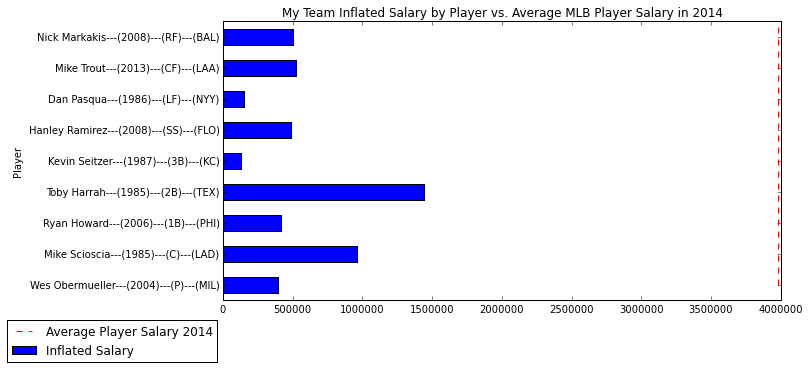

In [50]:
all_time_team_frame.plot(x='Player', y="Inflated Salary", kind="barh", figsize=(10, 5), legend=True, title="My Team Inflated Salary by Player vs. Average MLB Player Salary in 2014")
plt.vlines(avg_2014_mlb_sal, ymin=0, ymax=100,color="red", linestyle="dashed", label="Average Player Salary 2014")
plt.legend(bbox_to_anchor=(0, -0.05))
plt.show()